<a href="https://colab.research.google.com/github/kioneta/ML_first_steps/blob/main/Video_Game_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучаю модель на основе дата сета Video Game Sales - данные о продажах видеоигр.

Fields include:\
Rank - Ranking of overall sales\
Name - The games name\
Platform - Platform of the games release (i.e. PC,PS4, etc.)\
Year - Year of the game's release\
Genre - Genre of the game\
Publisher - Publisher of the game\
NA_Sales - Sales in North America (in millions)\
EU_Sales - Sales in Europe (in millions)\
JP_Sales - Sales in Japan (in millions)\
Other_Sales - Sales in the rest of the world (in millions)\
Global_Sales - Total worldwide sales.

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('vgsales.csv')

#Изучение данных + визуализация

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.shape

(16598, 11)

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
#Заполним пробелы
df["Year"].fillna(int(df["Year"].mean()),inplace=True)
df["Publisher"].fillna(df["Publisher"].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
#смотрю форматы колонок. Например интересно, что год - число с плав запятой.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
#Немного преобразую формат года
df["Year"] = df["Year"].astype(int)

In [ ]:
df["Year"].dtype

dtype('int64')

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16598.0,2006.399807,5.781426,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [ ]:
# Смотрю данные по буливым и строковым значениям.
df.describe(include=["object","bool"])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16598
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1409


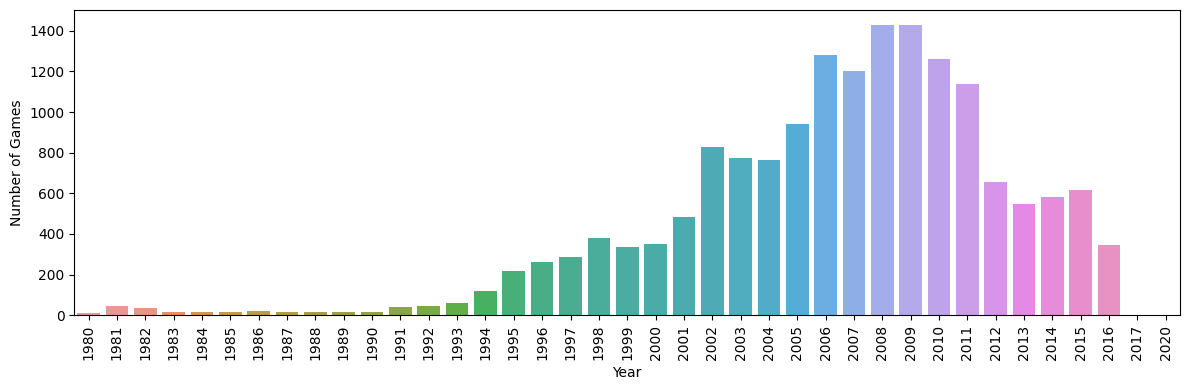

In [ ]:
#Визуализирую данные по продажам видеоигр по годам
plt.figure(figsize=(12,4))
sns.countplot(x=df["Year"])
plt.ylabel("Number of Games")
plt.xticks(rotation=90)
plt.tight_layout()

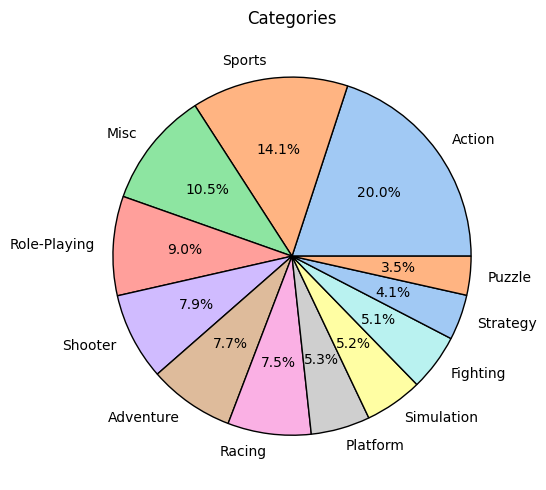

In [ ]:
# Смотрю пропрорцию категорий
plt.figure(figsize=(13,5))
Geners=dict(df["Genre"].value_counts())
Gene=Geners.keys()
Values=Geners.values()
colors = sns.color_palette('pastel')
plt.pie(Values,labels=Gene,wedgeprops={"edgecolor":"black"},colors = colors, autopct="%1.1f%%")
plt.title("Categories")
plt.tight_layout()

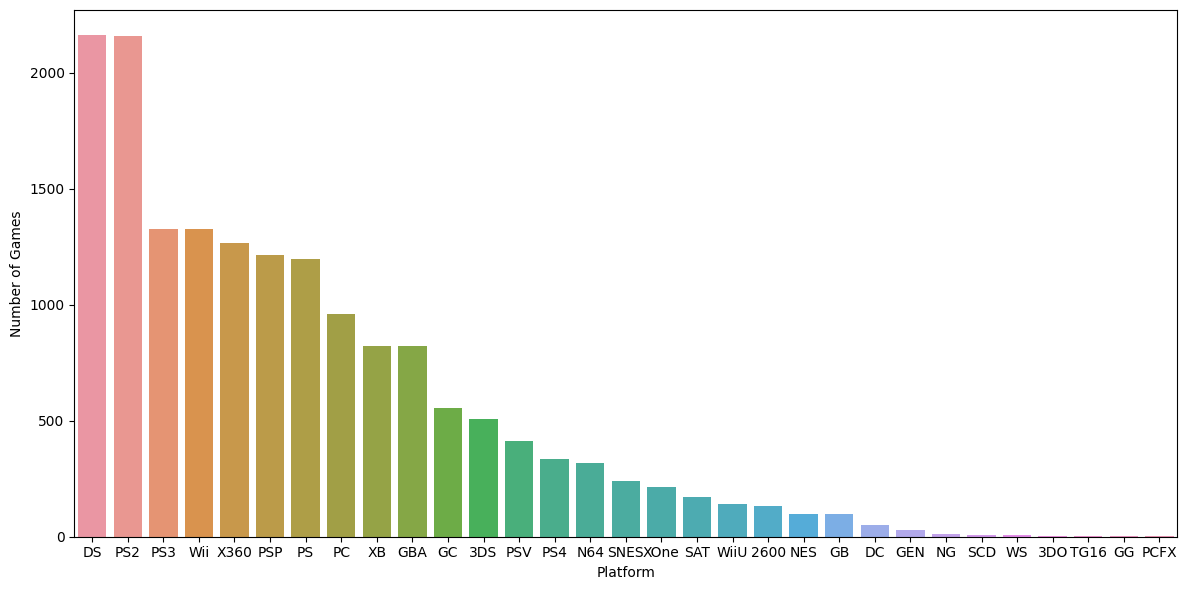

In [ ]:
# Какие платформы пользуются спросом
plt.figure(figsize=(12,6))
sns.countplot(x=df["Platform"], order=df["Platform"].value_counts().index)
plt.ylabel("Number of Games")
plt.tight_layout()

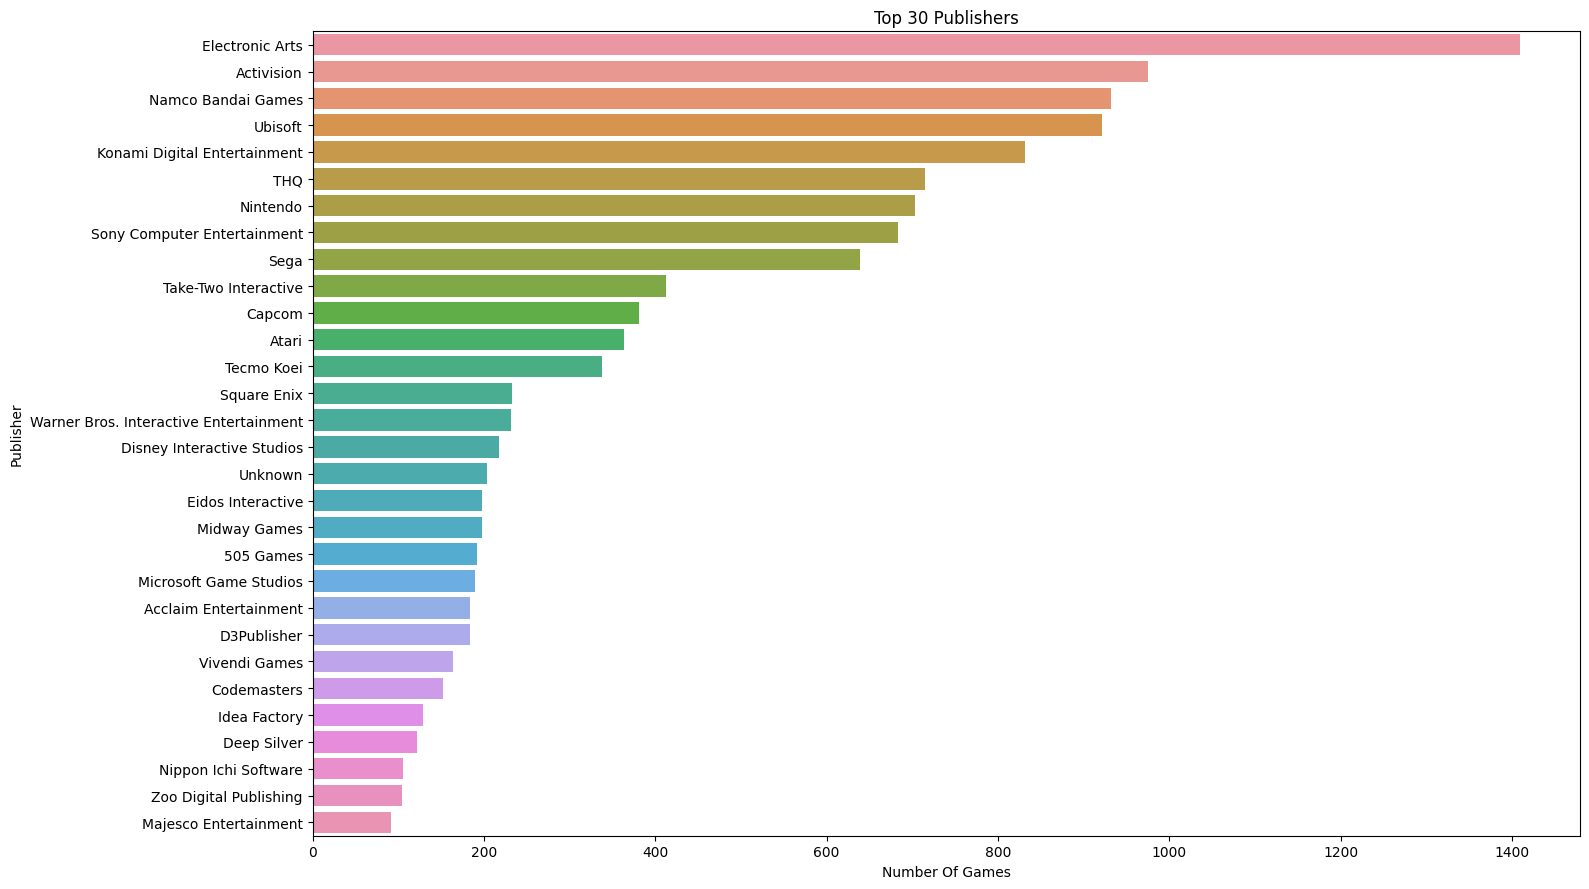

In [ ]:
#Топ 30 издателей
plt.figure(figsize=(16,9))
filt=df["Publisher"].value_counts().head(30).index.tolist()
Publisher_df=df[df["Publisher"].isin(filt)]
sns.countplot(y="Publisher",data=Publisher_df, order = Publisher_df["Publisher"].value_counts().index)
plt.xlabel("Number Of Games")
plt.title("Top 30 Publishers")
plt.tight_layout()

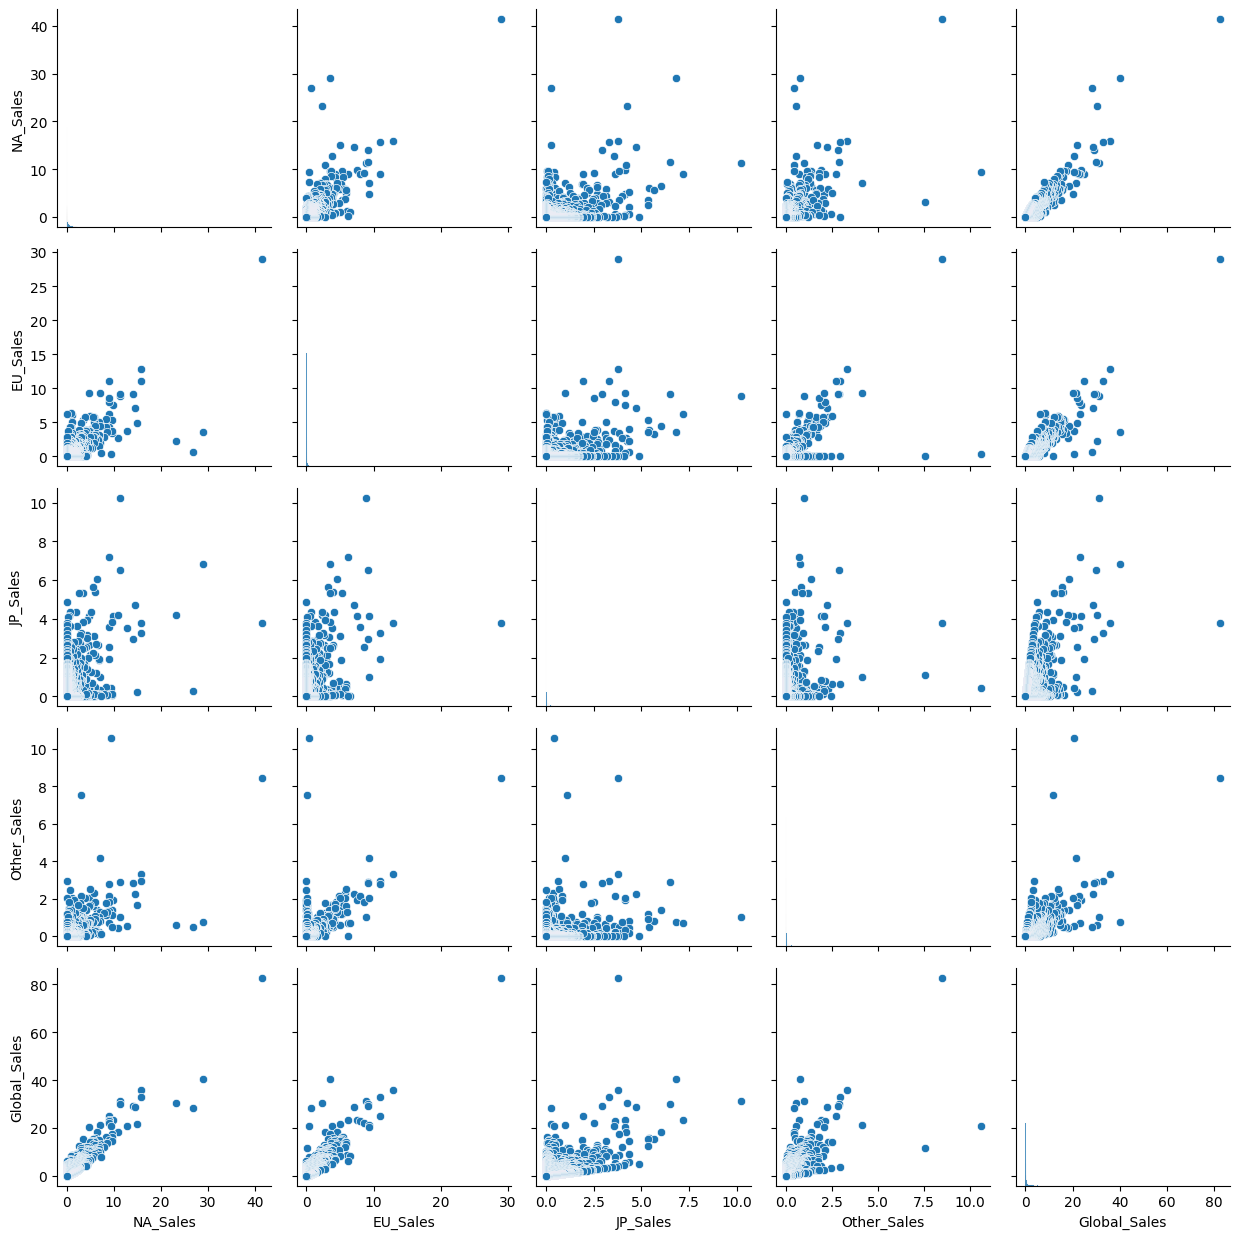

In [ ]:
num_col =["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]
sns.pairplot(df[num_col])
plt.tight_layout()

<Axes: >

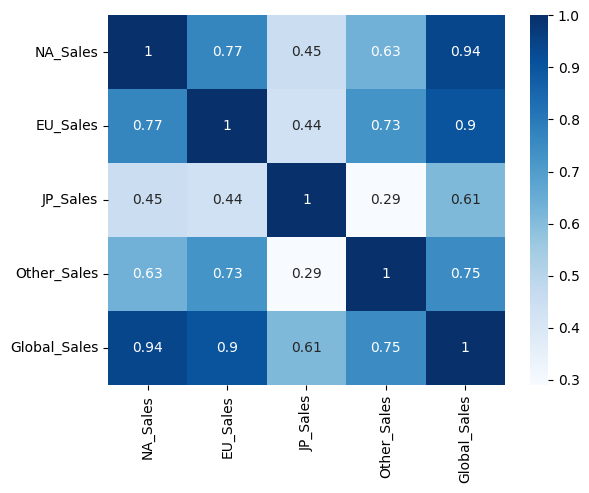

In [ ]:
#Выведу корреляцию числовых показателей
sns.heatmap(df[num_col].corr(), annot = True, cmap ="Blues")

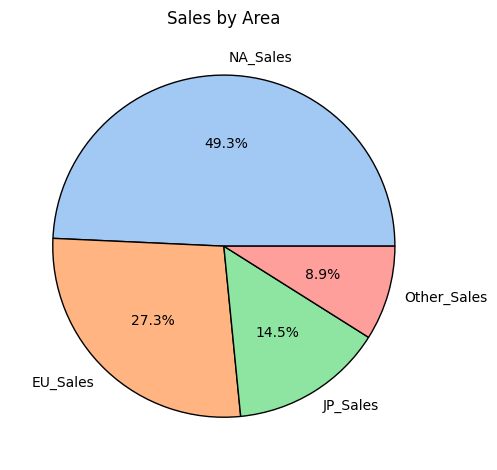

In [ ]:
# Построение круговой диаграммы с продажами по регионам
sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales_dict = dict(sales.sum())
region = list(sales_dict.keys())
region_value = list(sales_dict.values())
colors = sns.color_palette('pastel')
plt.pie(region_value, labels=region, colors=colors, wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%")
plt.title("Sales by Area")
plt.tight_layout()

In [ ]:
Genres=df[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
G=Genres.groupby(["Genre"]).sum() #групппировка по жанрам
Genres=G.reset_index() # возвращаем к обычному формату с индексами по умолчанию
Genres=pd.melt(Genres, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Area', value_name='Sale') #преобразуем формат из широкого в длинный
#Area пишем теперь в столбик


In [ ]:
Genres.head()

,Genre,Area,Sale
0,Action,NA_Sales,877.83
1,Adventure,NA_Sales,105.80
2,Fighting,NA_Sales,223.59
3,Misc,NA_Sales,410.24
4,Platform,NA_Sales,447.05


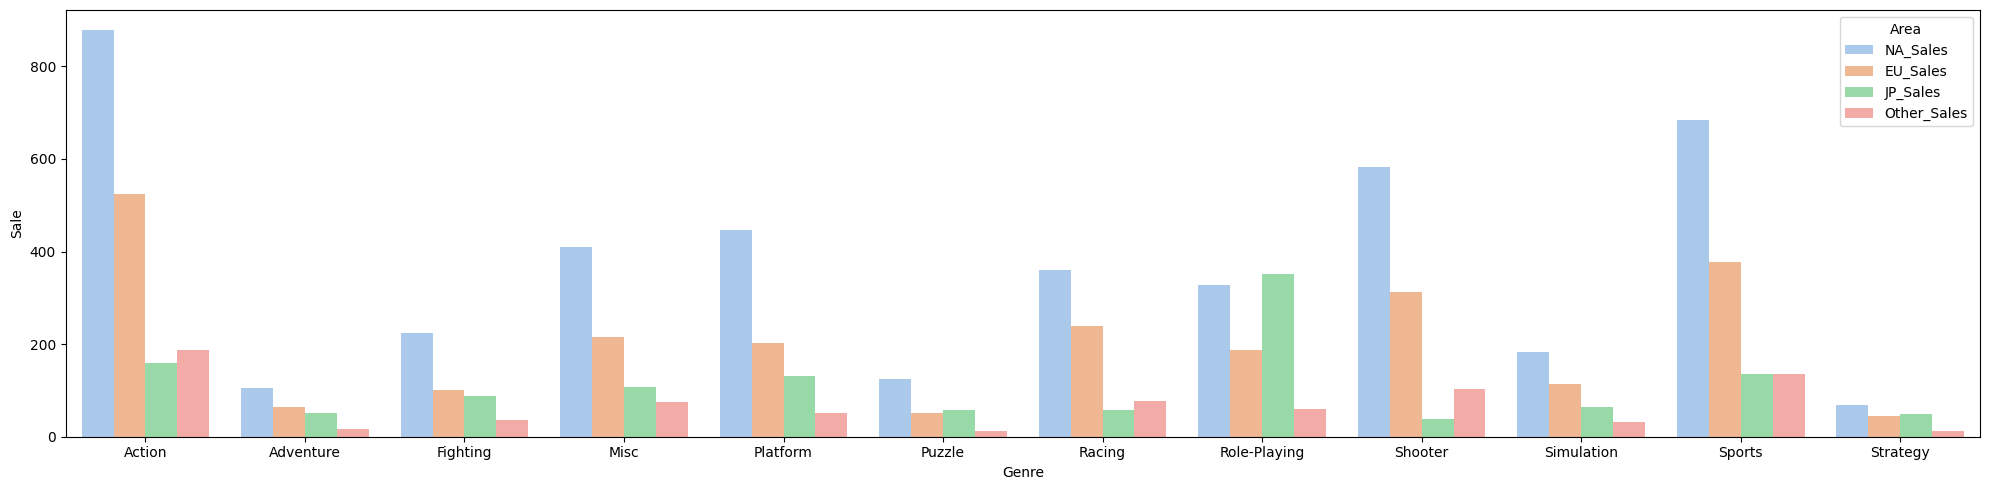

In [ ]:
# продажи видеоигр по различным жанрам и регионам
plt.figure(figsize=(20, 5))
sns.barplot(x="Genre",y="Sale",data=Genres,hue="Area", palette='pastel')
plt.tight_layout()

#Подготовка данных для модели

In [ ]:
#Удаление колонок, которые не содержат информации о продажах, помогает удержаться только на релевантных признаках, которые можно использовать для предсказания.
df.drop(["Rank","Name","Publisher"],axis=1,inplace=True)

In [ ]:
#переименовавыем колонку Платформ, т.к. дальше в столбце Genre есть такое же наименование
df.rename(columns={"Platform":"Platform1"},inplace=True)

In [ ]:
#Преобразуем данные жанра в бинарный формат
dummie = pd.get_dummies(df["Genre"])
df = pd.concat([df,dummie],axis=1)
df.drop("Genre",axis=1,inplace=True)

In [ ]:
label = LabelEncoder()
df["Platform1"] = label.fit_transform(df["Platform1"])

In [ ]:
df.head()

,Platform1,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,26,2006,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0
1,11,1985,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0
2,26,2008,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0
3,26,2009,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0
4,5,1996,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0


# Обучение и выбор лучшей модели

In [ ]:
import numpy as np
from math import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop("Global_Sales",axis=1)
Y = df["Global_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
#Отклонение остатков (Residual Standard Error, RSE) для оценки качества предсказаний модели регрессии. Отклонение остатков используется для измерения разницы между фактическими и предсказанными значениями и может использоваться для оценки точности модели.
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = sqrt(RSS / (len(y_true) - 2))
    return rse

In [ ]:
model1 = LinearRegression()

In [ ]:
MSE_1=[]
r_2_1=[]
RSE_1 = []
accuracy_1 = []

In [ ]:
model = model1
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pre=model.predict(X_test)

In [ ]:
#СК ошибка, коэф детерминации,Стандартная ошибка остатков модели регрессии
MSE_1.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
r_2_1.append(r2_score(y_true=y_test,y_pred=y_pre))
RSE_1.append(round(RSE(y_test,y_pre),5))
accuracy_1.append((model.score(X_test,y_test))*100)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model2 = RandomForestRegressor()

In [ ]:
model = model2
model.fit(X_train,y_train)
y_pre=model.predict(X_test)

In [ ]:
MSE_1.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
r_2_1.append(r2_score(y_true=y_test,y_pred=y_pre))
RSE_1.append(round(RSE(y_test,y_pre),5))
accuracy_1.append((model.score(X_test,y_test))*100)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model3 = GradientBoostingRegressor()

In [ ]:
model = model3
model.fit(X_train,y_train)
y_pre=model.predict(X_test)

In [ ]:
MSE_1.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
r_2_1.append(r2_score(y_true=y_test,y_pred=y_pre))
RSE_1.append(round(RSE(y_test,y_pre),5))
accuracy_1.append((model.score(X_test,y_test))*100)

In [ ]:
model_names=["LinearRegression","RandomForestRegressor","GradientBoostingRegressor"]

In [ ]:
model_report_1=pd.DataFrame({'Modelling Name':model_names,'MSE':MSE_1,"R_2":r_2_1,"RSE":RSE_1,"Accuracy":accuracy_1})

In [ ]:
#MSE разницу между фактическими значениями и предсказанными значениями модели. (СК ошибка). Чем меньше значение MSE, тем лучше модель предсказывает значения целевой переменной.
#R_2 коэф детерминации.Чем ближе значение R-квадрат к 1, тем лучше модель объясняет вариацию данных, и тем более точны ее прогнозы.
# RSE = sqrt(MSE). Стандартная ошибка остатков модели регрессии. Измеряет разброс остатков
model_report_1

,Modelling Name,MSE,R_2,RSE,Accuracy
0,LinearRegression,0.00003,0.999983,0.00528,99.998313
1,RandomForestRegressor,0.03801,0.976981,0.19500,97.698134
2,GradientBoostingRegressor,0.01128,0.993168,0.10623,99.316847


Лучшей моделью вышла линейная регрессия

# Немного изменим

In [ ]:
import numpy as np
from math import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Уберем колонку EU_Sales чтобы было место для предсказания.
df2 = df
df2.drop(["EU_Sales"],axis=1,inplace=True)

In [ ]:
X = df2.drop("Global_Sales",axis=1)
Y = df2["Global_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
#Отклонение остатков (Residual Standard Error, RSE) для оценки качества предсказаний модели регрессии. Отклонение остатков используется для измерения разницы между фактическими и предсказанными значениями и может использоваться для оценки точности модели.
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = sqrt(RSS / (len(y_true) - 2))
    return rse

In [ ]:
MSE=[]
r_2=[]
RSE_ = []
accuracy = []

In [ ]:
model1 = LinearRegression()
model = model1
model.fit(X_train,y_train)
y_pre=model.predict(X_test)
MSE.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
RSE_.append(round(RSE(y_test,y_pre),5))
accuracy.append((model.score(X_test,y_test))*100)

LinearRegression()

In [ ]:
model2 = RandomForestRegressor()
model = model2
model.fit(X_train,y_train)
y_pre=model.predict(X_test)
MSE.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
RSE_.append(round(RSE(y_test,y_pre),5))
accuracy.append((model.score(X_test,y_test))*100)

In [ ]:
model3 = GradientBoostingRegressor()
model = model3
model.fit(X_train,y_train)
y_pre=model.predict(X_test)
MSE.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
RSE_.append(round(RSE(y_test,y_pre),5))
accuracy.append((model.score(X_test,y_test))*100)

In [ ]:
model_names=["LinearRegression","RandomForestRegressor","GradientBoostingRegressor"]
model_report=pd.DataFrame({'Modelling Name':model_names,'MSE':MSE,"R_2":r_2,"RSE":RSE_,"Accuracy":accuracy})
#MSE разницу между фактическими значениями и предсказанными значениями модели. (СК ошибка). Чем меньше значение MSE, тем лучше модель предсказывает значения целевой переменной.
#R_2 коэф детерминации.Чем ближе значение R-квадрат к 1, тем лучше модель объясняет вариацию данных, и тем более точны ее прогнозы.
# RSE = sqrt(MSE). Стандартная ошибка остатков модели регрессии. Измеряет разброс остатков
model_report

,Modelling Name,MSE,R_2,RSE,Accuracy
0,LinearRegression,0.11348,0.948428,0.33693,94.842759
1,RandomForestRegressor,0.12192,0.944589,0.34924,94.458916
2,GradientBoostingRegressor,0.19889,0.909609,0.44606,90.960911
